## Observations and Insights 

In [1307]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
from scipy import stats


# Study data files
mouse_metadata_path = "C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_05_Matplotlib\\Homework\\Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_05_Matplotlib\\Homework\\Pymaceuticals\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [1281]:
mouse_metadata.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17


In [1282]:
study_results = study_results.rename(columns={'Tumor Volume (mm3)':'Tumor Volume'})

In [1283]:
study_results.head(2)

,Mouse ID,Timepoint,Tumor Volume,Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [1284]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [1285]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = mouse_study[mouse_study.duplicated(['Timepoint', 'Mouse ID'], keep = False)]

In [1286]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1287]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study.drop([908, 909, 910, 911, 912, 913, 914, 915, 917], axis=0)

In [1288]:
# Checking the number of mice in original merged DataFrame.
mouse_study["Mouse ID"].count()

1893

In [1289]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean["Mouse ID"].count()

1884

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

In [1290]:
regimen_stats = pd.DataFrame({"Mean": mouse_study_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume"],
                             "Median": mouse_study_clean.groupby(["Drug Regimen"]).median()["Tumor Volume"], 
                             "Variance": mouse_study_clean.groupby(["Drug Regimen"]).var()["Tumor Volume"],
                             "Standard Deviation": mouse_study_clean.groupby(["Drug Regimen"]).std()["Tumor Volume"],
                             "SEM": mouse_study_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume"]})   

format_stats_dict = {'Mean': '{:.2f}', 'Median': '{:.2f}', 'Variance': '{:.2f}', 
                     'Standard Deviation': '{:.2f}', 'SEM': '{:.2f}'}

regimen_stats.style.format(format_stats_dict)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.48,50.91,43.82,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [342]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

<IPython.core.display.Javascript object>


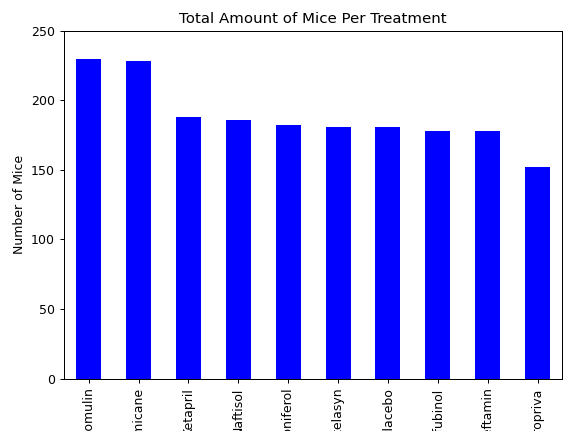

In [1291]:
bar_pandas = plt.figure()

plt.title("Total Amount of Mice Per Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(number_of_mice)+20)
plt.tight_layout()

mouse_study_clean['Drug Regimen'].value_counts().plot.bar(color="b", align="center")
plt.show()

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

<IPython.core.display.Javascript object>


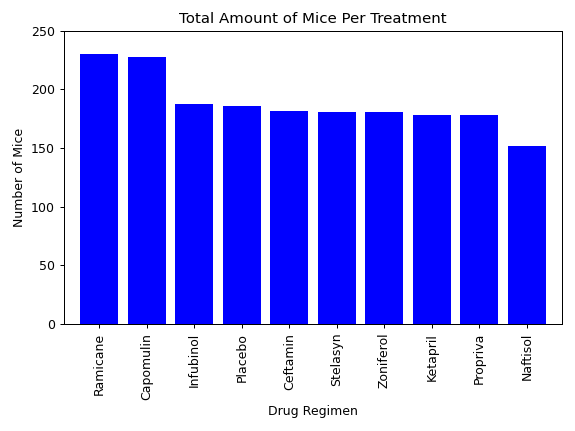

In [1292]:
treatment_mice = mouse_study_clean['Drug Regimen'].value_counts()

bar_mpl = plt.figure()

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens, rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(number_of_mice)+20)
plt.title("Total Amount of Mice Per Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.tight_layout()

plt.bar(treatment_mice.index.values, treatment_mice.values, color="b", align="center")
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

<IPython.core.display.Javascript object>


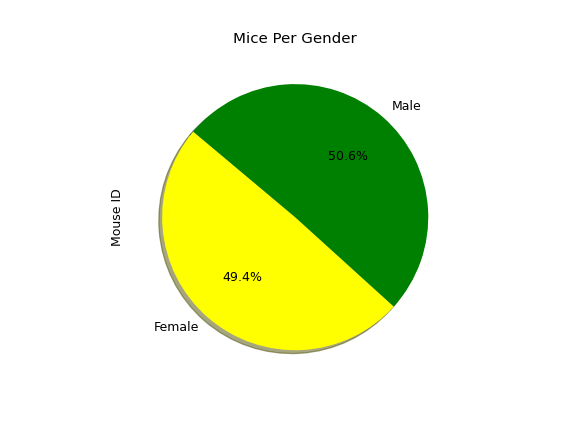

In [1293]:
pie_pandas = plt.figure()

labels = ["Female", "Male"]
colors = ["yellow", "green"]
plt.title("Mice Per Gender")

mouse_study.groupby(["Sex"]).count()["Mouse ID"].plot.pie(shadow=True, startangle=140,
                       colors=colors, autopct="%1.1f%%", subplots=True)
plt.show()

In [622]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

<IPython.core.display.Javascript object>


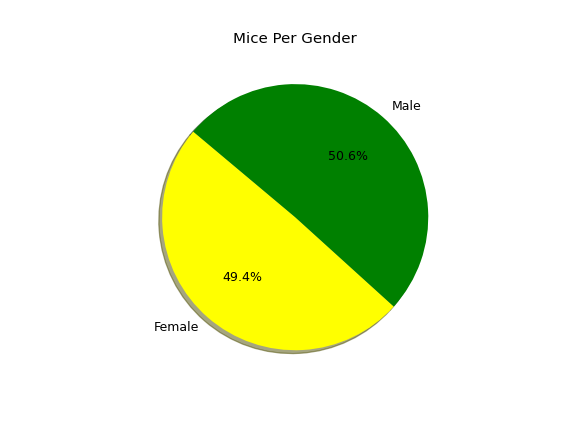

In [1294]:
sections = mouse_study.groupby(["Sex"]).count()["Mouse ID"]

pie_mpl = plt.figure()

labels = ["Female", "Male"]
colors = ["yellow", "green"]
plt.title("Mice Per Gender")
plt.title("Mice Per Gender")

plt.pie(sections,  labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [864]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [1295]:
# Start by getting the last (greatest) timepoint for each mouse
timepoint = mouse_study_clean.groupby(["Mouse ID"])["Timepoint"].max()
timepoint =  timepoint.reset_index()
timepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [1376]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume = timepoint.merge(mouse_study_clean, on=["Mouse ID", "Timepoint"], how = "left")
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [1325]:
# Put treatments into a list for for loop (and later for plot labels)

In [1389]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = final_tumor_volume.iloc[:,2]
#treatments.head(20)
capomulin = treatments[19]
ramicane = treatments[6]
infubinol = treatments[0]
ceftamin = treatments[3]
treatments_list = ["capomulin", "ramicane", "infubinol", "ceftamin"]
treatments_list

['capomulin', 'ramicane', 'infubinol', 'ceftamin']

In [1390]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

In [1393]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    # Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in final_tumor_volume:
    if row[2] in treatments_list:
        tumor_volume_list.append(row[6])
    else:
        pass
print(tumor_volume_list) 

    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
#quartiles = subset.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

[]


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#data = []
#fig1, ax1 = plt.subplots()
#ax1.set_title('Final Tumor Volume: Treatment Name')
#ax1.set_ylabel('Final Tumor Volume')
#ax1.set_ylabel('Mouse ID')
#ax1.boxplot(data)
#plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [1364]:
ccapomulin = mouse_study_clean.loc[(mouse_study_clean["Drug Regimen"] == "Capomulin")]
#capomulin.head(12)

In [1365]:
line_capomulin = ccapomulin.iloc[0:10]
#scatter_capomulin

<IPython.core.display.Javascript object>


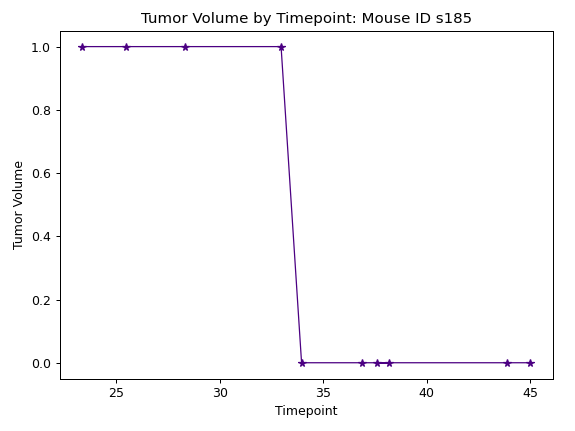

In [1366]:
line = plt.figure()

time_point = line_capomulin.iloc[:,6]
vol_tumor = line_capomulin.iloc[:,7]
plt.title("Tumor Volume by Timepoint: Mouse ID s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.tight_layout()

plt.plot(time_point, vol_tumor, marker="*", color="indigo", linewidth=1, label="Tumor Volume")
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [1367]:
average_vol = pd.DataFrame({"Average Tumor Volume": ccapomulin.groupby(["Mouse ID"]).mean()["Tumor Volume"]})

In [1368]:
average_vol.head(1)

,Average Tumor Volume
Mouse ID,
b128,41.963636


In [1369]:
average_volume = average_vol.merge(ccapomulin, on=["Mouse ID", "Mouse ID"])
average_volume.head(2)

,Mouse ID,Average Tumor Volume,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,b128,41.963636,Capomulin,Female,9,22,0,45.000000,0
1,b128,41.963636,Capomulin,Female,9,22,5,45.651331,0


<IPython.core.display.Javascript object>


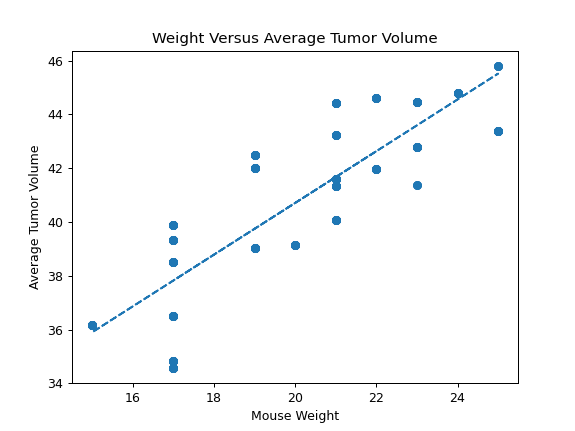

The correlation between both factors is 0.83.


In [1370]:
scatter = plt.figure()

weight = average_volume.iloc[:,5]
average_tumor_volume = average_volume.iloc[:,1] 

plt.title("Weight Versus Average Tumor Volume")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.plot(weight,wt_fit,"--")

plt.scatter(weight,average_tumor_volume)
plt.show()

print(f"The correlation between both factors is {round(correlation[0],2)}.")
#plt.xticks(weight) use for more complicated plotting

## Correlation and Regression

In [1306]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [1371]:
correlation = st.pearsonr(weight,average_tumor_volume)
correlation

(0.8343958614425964, 6.495737656133368e-61)

In [1372]:
wt_slope, wt_int, wt_r, wt_p, wt_std_err = stats.linregress(weight, average_tumor_volume)
wt_fit = wt_slope * weight + wt_int
wt_fit

0      42.631100
1      42.631100
2      42.631100
3      42.631100
4      42.631100
         ...    
225    37.826265
226    37.826265
227    37.826265
228    37.826265
229    37.826265
Name: Weight (g), Length: 230, dtype: float64